## Face recognition

According to Yan, Kriegman, and Ahuja, face detection can be categorized into **feature-based, appearance-based, knowledge-based** and **template matching**. As the name suggests, feature-based relies on structural features of the face, whereas knowledge-based relies on the pre-existing knowledge and rules pertaining to the face constitution. Template matching correlates the input images with pre-defined, parametrized templates whereas appearance-based banks on a training set to generate face models. 

The last method *(appearance-based)* has superior performance as it involves *statistical analysis* and *machine learning*. Another application of this method would be face feature extraction.
 

### Sub-methods of Appearance-based methodology 

Following are the sub-methods and we are planning to employ Eigen-based method and SVM, among others, for our analysis. 

+ **Eigenface-based method:-** has been around since 1991 and uses Principal Component Analysis (PCA) to efficiently represent faces. PCA happens to be the linear dimensionality reduction using approximated Singular Value Decomposition of the data and keeping only the most significant singular vectors to project the data to a lower dimensional space.

+ **Distribution-based method:-** The algorithms like PCA and Fisher’s Discriminant can be used to define the subspace representing facial patterns. There is a trained classifier, which correctly identifies instances of the target pattern class from the background image patterns.

+ **Neural-Networks:-** Many detection problems like object detection, face detection, emotion detection, and face recognition, etc. have been faced successfully by Neural Networks.

+ **Support Vector Machine (SVM):-** Support Vector Machines are linear classifiers that maximise the margin between the decision hyperplane and the examples in the training set. Osuna et al. first applied this classifier to face detection.

+ **Sparse Network of Winnows:-** They defined a sparse network of two linear units or target nodes; one represents face patterns and other for the non-face patterns. It is less time consuming and efficient.

+ **Naive Bayes Classifiers:-** They computed the probability of a face to be present in the picture by counting the frequency of occurrence of a series of the pattern over the training images. The classifier captured the joint statistics of local appearance and position of the faces.

+ **Hidden Markov Model:-** The states of the model would be the facial features, which usually described as strips of pixels. HMM’s commonly used along with other methods to build detection algorithms.

+ **Information Theoretical Approach:-** Markov Random Fields (MRF) can use for face pattern and correlated features. The Markov process maximises the discrimination between classes using Kullback-Leibler divergence. Therefore this method can be used in Face Detection.

+ **Inductive Learning:-** This approach has been used to detect faces. Algorithms like Quinlan’s C4.5 or Mitchell’s FIND-S used for this purpose.


*Source for the above data: http://faculty.ucmerced.edu/mhyang/facedetection.html, https://towardsdatascience.com/face-detection-for-beginners-e58e8f21aad9, http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.decomposition.RandomizedPCA.html*

The code was adapted from the below source, published in 2013 by Olivier Grisel. I express my sincere gratitude to the contributor.

https://github.com/ogrisel/notebooks/blob/master/Labeled%20Faces%20in%20the%20Wild%20recognition.ipynb
http://nbviewer.jupyter.org/github/ogrisel/notebooks/blob/master/Labeled%20Faces%20in%20the%20Wild%20recognition.ipynb

In [1]:
%pylab inline

import pylab as pl
import numpy as np
import sklearn

Populating the interactive namespace from numpy and matplotlib


### Load the dataset

We are going to utilize a built-in dataset from sklearn. 


In [2]:
from sklearn.datasets import fetch_lfw_people

# Fetch the images as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

The wild labeled dataset contains faces belonging to seven dignitaries (Ariel Sharon, Colin Powell, Donald Rumsfeld, George W Bush, Gerhard Schroeder, Hugo Chavez and Tony Blair). We study and plot the attributes in the below step.

In [3]:
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

n_samples, n_features = X.shape
_, h, w = lfw_people.images.shape
n_classes = len(names)

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes),"\n\nNames are:")
for name in lfw_people.target_names:
    print(name)

n_samples: 1288
n_features: 1850
n_classes: 7 

Names are:
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair


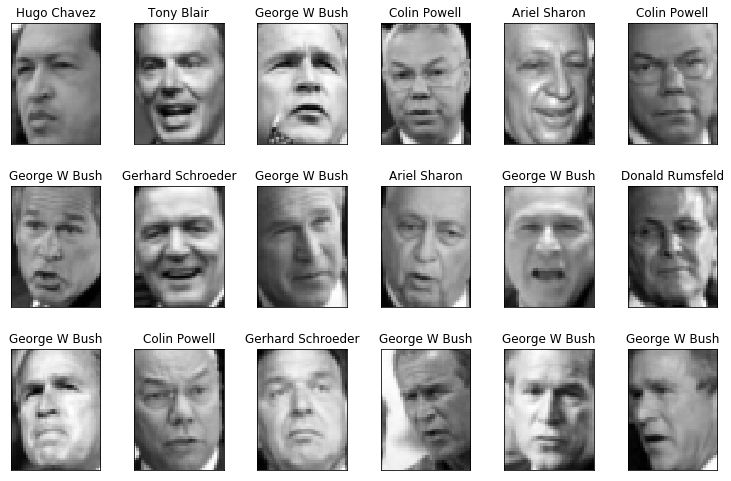

In [4]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1), pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
        pl.title(titles[i], size=12),pl.xticks(()),pl.yticks(())
plot_gallery(X, names[y], h, w)

Next, we plot the unique elements of the image arrays.

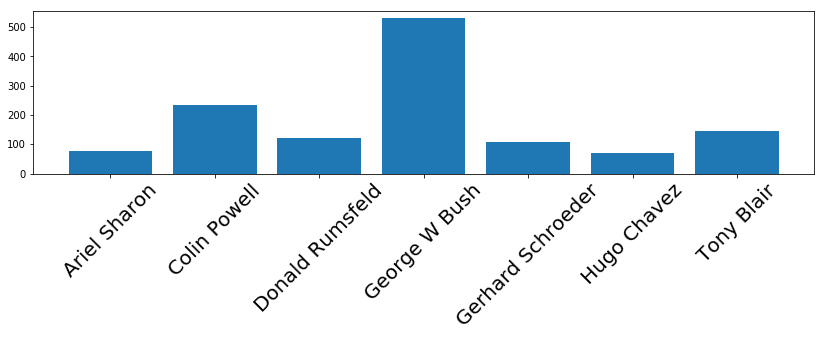

In [5]:
pl.figure(figsize=(14, 3))

y_unique = np.unique(y)
counts = [(y == i).sum() for i in y_unique]

pl.xticks(y_unique,  names[y_unique])
locs, labels = pl.xticks()
pl.setp(labels, rotation=45, size=20)
_ = pl.bar(y_unique, counts)

The dataset is split into training and testing set of size 75% and 25% respectively.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

We are performing the Principal component analysis (PCA) with 150 components. 

In [7]:
from sklearn.decomposition import PCA

n_components = 150

print (f'Extracting the top {n_components} eigenfaces from {X_train.shape[0]} faces')

pca = PCA(n_components=n_components, whiten=True, svd_solver = 'randomized')

%time pca.fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 150 eigenfaces from 966 faces
Wall time: 104 ms


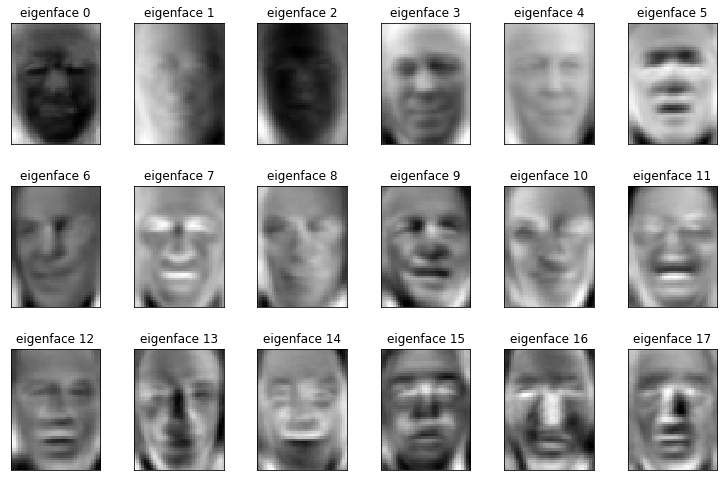

In [8]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

Apply PCA-based dimensionality reduction on the training set of X, and perform C-Support Vector (SVC) classification. 

In [9]:
X_train_pca = pca.transform(X_train)

In [10]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', class_weight=None)

svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

cv = StratifiedShuffleSplit(y_train, test_size=0.20, n_iter=3)

% time svm_cv_scores = cross_val_score(svm, X_train_pca, y_train, groups=None,scoring=None,cv=None, n_jobs=2, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
# Changed scoring from f1 to None due to ValueError: Target is multiclass but average='binary'. 

svm_cv_scores

Wall time: 1.49 s


array([0.66975309, 0.64906832, 0.65      ])

In [13]:
print("Mean:", svm_cv_scores.mean(), "\nStandard Deviation:", svm_cv_scores.std())

Mean: 0.6562738031337064 
Standard Deviation: 0.009538878828104249


**GridSearchCV** performs a thorough search of the given parameters for an estimator. Here, we are automating the search for the best parameters using a cross-validation Grid search that ends up fine-tuning the hyper-parameters. Thereafter, we can train a SVM classification model.

In [15]:
from sklearn.grid_search import GridSearchCV

param_grid = {
    'C': [1e3, 5e3, 1e4, 5e4, 1e5],
    'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}

clf = GridSearchCV(svm, param_grid, scoring=None, cv=cv, n_jobs=2)

In [16]:
%time clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by randomized hyper parameter search:")
print(clf.best_params_)
print("Best parameters validation score: {:.3f}".format(clf.best_score_))

Wall time: 25.6 s
Best estimator found by randomized hyper parameter search:
{'C': 100000.0, 'gamma': 0.005}
Best parameters validation score: 0.830


In [17]:
X_test_pca = pca.transform(X_test)
y_pred = clf.predict(X_test_pca)

Now it's time to view the results.

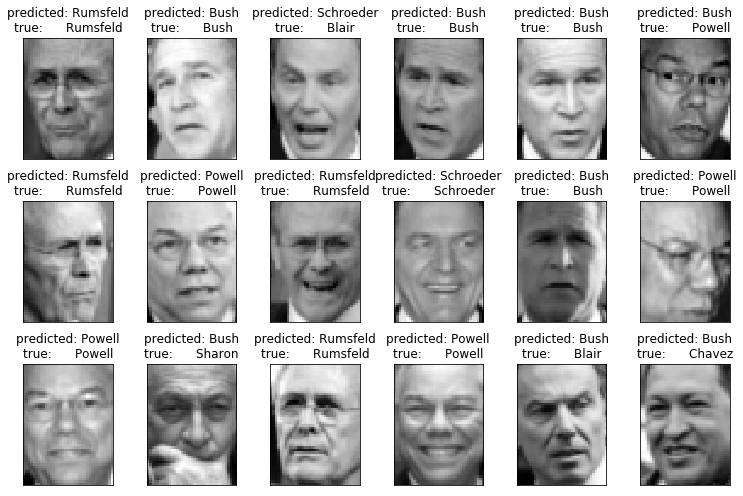

In [18]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)


 Finally, let's perform a quantitative evaluation of the predictions.

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.94      0.64      0.76        25
     Colin Powell       0.81      0.88      0.84        65
  Donald Rumsfeld       0.87      0.69      0.77        29
    George W Bush       0.79      0.97      0.87       113
Gerhard Schroeder       0.90      0.84      0.87        32
      Hugo Chavez       1.00      0.55      0.71        20
       Tony Blair       0.90      0.74      0.81        38

      avg / total       0.85      0.84      0.83       322



In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=range(n_classes))
print(cm)

[[ 16   3   0   5   1   0   0]
 [  0  57   1   7   0   0   0]
 [  1   3  20   5   0   0   0]
 [  0   2   1 110   0   0   0]
 [  0   0   1   2  27   0   2]
 [  0   2   0   6   0  11   1]
 [  0   3   0   5   2   0  28]]


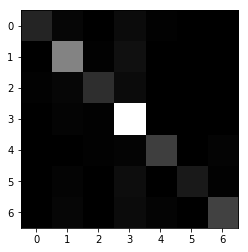

In [21]:
# Plot the confusion matrix
pl.gray()
_ = pl.imshow(cm, interpolation='nearest')